<a href="https://colab.research.google.com/github/Rajesh2015/Credit-Card-Transaction-Sql-Analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/Titanic+Data+Set.csv')

## Data Description:
PassengerID	Id of the passenger
Survived	Flag to indicate whether the passenger survived or not	0 = No, 1 = Yes
Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
Name	Name of the Passenger
Sex	Sex of the Passenger
Age	Age in years
SibSp	# of siblings/spouses aboard the Titanic
Parch	# of parents/children aboard the Titanic
Ticket	Ticket number
Fare	Fare of the ticket
Cabin	Cabin number
Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [13]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [7]:
data.Age.isnull().sum()

177

In [10]:
cols=data.columns

In [11]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Age,177,19.865
Cabin,687,77.104
Embarked,2,0.224


In [ ]:
pd.DataFrame({'Count'})

In [12]:
data[data.Embarked.isnull()]['PassengerId'].value_counts()

PassengerId
62     1
830    1
Name: count, dtype: int64

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
data.drop(columns='Cabin',axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Sex'>

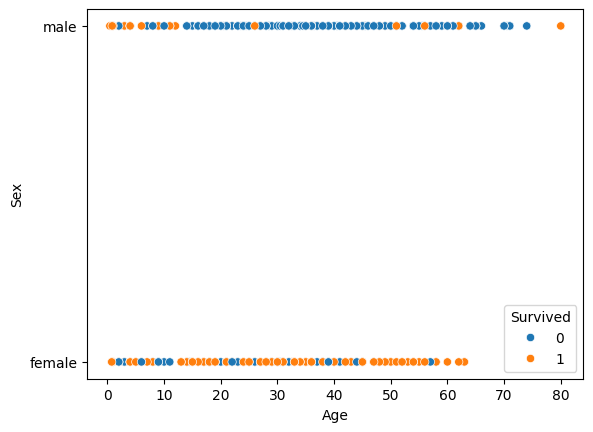

In [20]:
sns.scatterplot(data=data,x='Age',y='Sex',hue='Survived')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


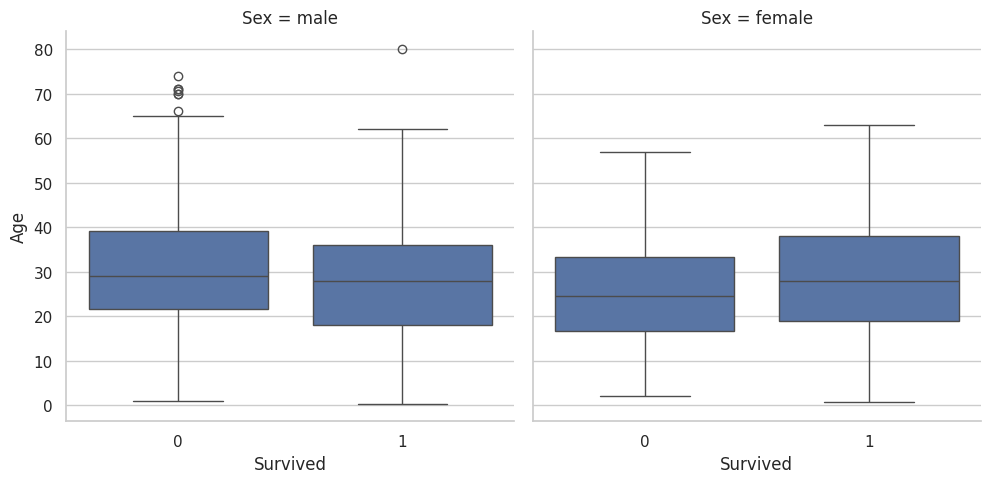

In [22]:
sns.set(style="whitegrid")

# Create a FacetGrid for two separate plots by 'Sex'
g = sns.FacetGrid(data, col="Sex", height=5, aspect=1)
g.map(sns.boxplot, "Survived", "Age")

# Adjust the layout
g.add_legend()
plt.show()

In [32]:
data.groupby(['Parch'])['PassengerId'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64

<Axes: xlabel='Parch', ylabel='Count'>

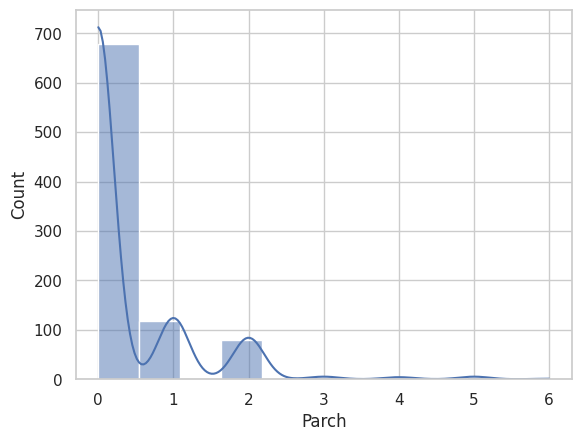

In [23]:
sns.histplot(data=data,x='Parch',kde=True)

<Axes: xlabel='Parch', ylabel='count'>

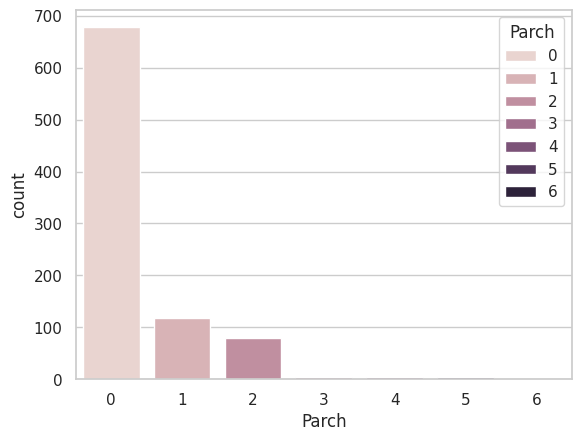

In [29]:
sns.countplot(data=data,x='Parch',hue='Parch')

<Axes: xlabel='Pclass', ylabel='count'>

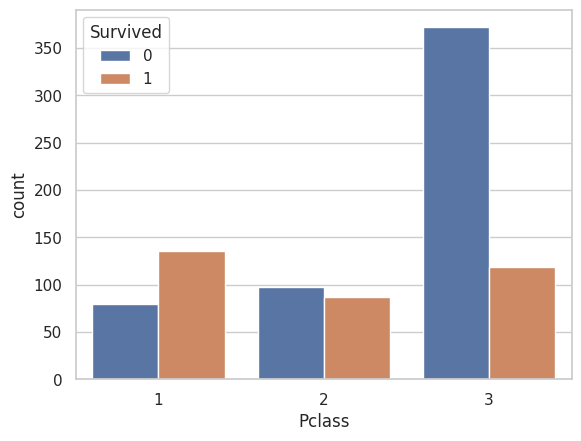

In [33]:
sns.countplot(data=data,x='Pclass',hue='Survived')

In [41]:
ticketclass=data['Pclass'].unique()

In [40]:


df=data[data['Survived']==1].groupby(['Pclass'])['PassengerId'].count()
df['ratio']=df[]
df.head()

Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

In [42]:
grouped = data.groupby(['Pclass', 'Survived'])['PassengerId'].count()

# Create a DataFrame to hold the results
results = pd.DataFrame(index=grouped.index.levels[0])

# Extract counts for survived and not survived
results['Survived'] = grouped[:, 1]
results['Not Survived'] = grouped[:, 0]

# Fill NaN values with 0 (in case there are no survivors or non-survivors in a class)
results = results.fillna(0)

# Calculate the ratio of survived to not survived for each ticket class
results['Survived Ratio'] = results['Survived'] / results['Not Survived']

<Axes: xlabel='Embarked', ylabel='count'>

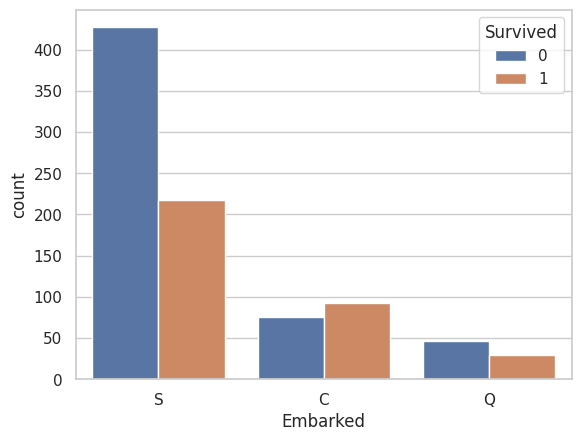

In [45]:
sns.countplot(data=data,x='Embarked',hue='Survived')

In [43]:
results.head()

,Survived,Not Survived,Survived Ratio
Pclass,,,
1,136,80,1.700
2,87,97,0.897
3,119,372,0.320


<Axes: xlabel='Sex', ylabel='Fare'>

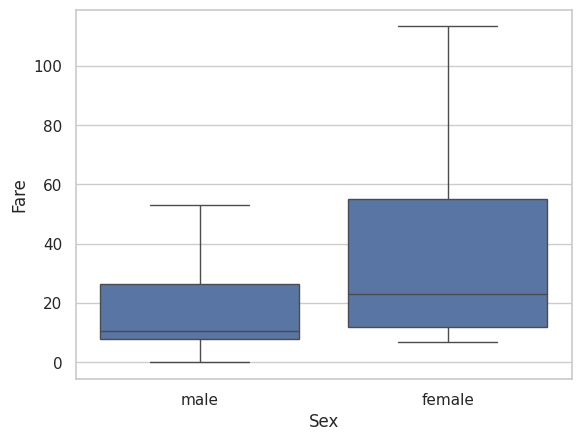

In [47]:
sns.boxplot(data=data, x='Sex', y='Fare', showfliers=False)